In [1]:
%matplotlib widget

In [5]:
import sys
sys.path.append('../..')
from lcs import SRC_ROOT
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import copy
from lcs.configs import Config
from run_script import get_data
from lcs import TEXTWIDTH, PAGEHEIGHT
from lcs.plotting_utils import *

In [6]:
comp_cfg = Config(input_size=20,
       output_size=6,
       num_seeds=10, 
       num_contexts=3,
       num_paths=3,
       batch_size=200,
       initialization_scale=0.01,
       regularization_strength=0.3,
       num_layers=1,
       hidden_size=6,
       context_model=True,
       name='comp_L1',
       regularization_type=[('nonnegative', 1),
                            ('gating_manifold_L1', 5.)],
       shared_teachers=True,
       shared_concat_teachers=False,
       c_gt_curriculum="A_B_C__AB_BC_CA__",
       Y_tgt=None,
       W_teachers='generate',
       use_X=True,
       metric='cosine',
       teacher_mode='orthogonal',
       num_blocks=30,
       t_tot=30,
       T_tot=1000,
       block_duration=1.0,
       W_lr=None,
       W1_lr=None,
       W2_lr=None,
       c_lr=None,
       W_tau=0.2, 
       W1_tau=None,
       W2_tau=None,
       c_tau=0.03, 
       dt=0.001,
       log_every=1,
       T_tape=10000, 
       dt_tape=0.001,
       control='',
       data_out_dir='data_internal/generalization/',
       results_out_dir='results_internal/generalization/',
       num_shared_contexts=0,
       mixing_factor=0.5,
       W_regularization_strength=0.0,
       turn_off_regularization=False,
       log_aux=False,
        )
comp_tape, comp_args = get_data(comp_cfg)

/Users/alex/anaconda3/envs/NTA/lib/python3.13/site-packages/jax/_src/numpy/lax_numpy.py:6944: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  start = asarray(start, dtype=computation_dtype)
/Users/alex/anaconda3/envs/NTA/lib/python3.13/site-packages/jax/_src/numpy/lax_numpy.py:6945: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  stop = asarray(stop, dtype=computation_dtype)
/Users/alex/anaconda3/envs/NTA/lib/python3.13/site-packages/jax/_src/numpy/lax_numpy.py:6954: UserWarning:

[INFO] [2025-02-18 20:36:12,840] in lcs.joint_learning: Running 10 seeds on device TFRT_CPU_0 with config Config(input_size=20,
       output_size=6,
       num_seeds=10,
       num_contexts=3,
       num_paths=3,
       batch_size=200,
       initialization_scale=0.01,
       gate_second=True,
       turn_off_regularization=False,
       regularization_strength=0.3,
       num_layers=1,
       hidden_size=6,
       context_model=True,
       name='comp_L1',
       regularization_type=[('nonnegative', 1), ('gating_manifold_L1', 5.0)],
       shared_teachers=True,
       shared_concat_teachers=False,
       c_gt_curriculum='A_B_C__AB_BC_CA__',
       Y_tgt=None,
       use_X=True,
       metric='cosine',
       teacher_mode='orthogonal',
       teacher_xx=0.0,
       teacher_scale='d_in',
       teacher_rotate=True,
       t_tot=30,
       T_tot=30000,
       num_blocks=31,
       block_duration=1.0,
       W_lr=None,
       W1_lr=None,
       W2_lr=None,
       c_lr=None,
       W_tau=

In [7]:
forget_comp_cfg = copy.deepcopy(comp_cfg)
forget_comp_cfg.regularization_strength = 0
forget_comp_cfg.name = 'forget_comp_L1'
forget_comp_tape, forget_comp_args = get_data(forget_comp_cfg)

[INFO] [2025-02-18 20:36:31,486] in lcs.joint_learning: Running 10 seeds on device TFRT_CPU_0 with config Config(input_size=20,
       output_size=6,
       num_seeds=10,
       num_contexts=3,
       num_paths=3,
       batch_size=200,
       initialization_scale=0.01,
       gate_second=True,
       turn_off_regularization=False,
       regularization_strength=0,
       num_layers=1,
       hidden_size=6,
       context_model=True,
       name='forget_comp_L1',
       regularization_type=[('nonnegative', 1), ('gating_manifold_L1', 5.0)],
       shared_teachers=True,
       shared_concat_teachers=False,
       c_gt_curriculum='A_B_C__AB_BC_CA__',
       Y_tgt=None,
       use_X=True,
       metric='cosine',
       teacher_mode='orthogonal',
       teacher_xx=0.0,
       teacher_scale='d_in',
       teacher_rotate=True,
       t_tot=30,
       T_tot=30000,
       num_blocks=31,
       block_duration=1.0,
       W_lr=None,
       W1_lr=None,
       W2_lr=None,
       c_lr=None,
       W

In [8]:
conc_cfg = Config(input_size=20,
       output_size=6,
       num_seeds=10, 
       num_contexts=3,
       num_paths=3,
       batch_size=200,
       initialization_scale=0.01,
       regularization_strength=0.025,
       num_layers=1,
       hidden_size=6,
       context_model=False,
       name='conc_L2',
       regularization_type=[('nonnegative', 1),
                            ('gating_manifold_L2', 10.)],
       shared_teachers=None,
       shared_concat_teachers=True,
       c_gt_curriculum="A_B_C__AB_BC_CA__",
       Y_tgt=None,
       W_teachers='generate',
       use_X=True,
       metric='cosine',
       teacher_mode='orthogonal',
       num_blocks=30,
       t_tot=30,
       T_tot=1000,
       block_duration=1.0,
       W_lr=None,
       W1_lr=None,
       W2_lr=None,
       c_lr=None,
       W_tau=0.2, 
       W1_tau=None,
       W2_tau=None,
       c_tau=0.005, 
       dt=0.01,
       log_every=1,
       T_tape=10000, 
       dt_tape=0.01,
       control='N_diag_mono',
       data_out_dir='data_internal/generalization/',
       results_out_dir='results_internal/generalization/',
       num_shared_contexts=0,
       mixing_factor=0.5,
       W_regularization_strength=0.0,
       turn_off_regularization=False,
       log_aux=False,
        )
conc_tape, conc_args = get_data(conc_cfg)

[WARNING] [2025-02-18 20:36:49,768] in lcs.configs: Using a dt > 1e-3 introduces finite-size effects!
[WARNING] [2025-02-18 20:36:49,769] in lcs.configs: Using a dt > 1e-3 introduces finite-size effects!
[INFO] [2025-02-18 20:36:50,139] in lcs.joint_learning: Running 10 seeds on device TFRT_CPU_0 with config Config(input_size=20,
       output_size=6,
       num_seeds=10,
       num_contexts=3,
       num_paths=3,
       batch_size=200,
       initialization_scale=0.01,
       gate_second=True,
       turn_off_regularization=False,
       regularization_strength=0.025,
       num_layers=1,
       hidden_size=6,
       context_model=False,
       name='conc_L2',
       regularization_type=[('nonnegative', 1), ('gating_manifold_L2', 10.0)],
       shared_teachers=None,
       shared_concat_teachers=True,
       c_gt_curriculum='A_B_C__AB_BC_CA__',
       Y_tgt=None,
       use_X=True,
       metric='cosine',
       teacher_mode='orthogonal',
       teacher_xx=0.0,
       teacher_scale='d

In [9]:
forget_conc_cfg = copy.deepcopy(conc_cfg)
forget_conc_cfg.regularization_strength = 0
forget_conc_cfg.name = 'forget_conc_L2'
forget_conc_tape, forget_conc_args = get_data(forget_conc_cfg)

[WARNING] [2025-02-18 20:37:13,436] in lcs.configs: Using a dt > 1e-3 introduces finite-size effects!
[INFO] [2025-02-18 20:37:13,505] in lcs.joint_learning: Running 10 seeds on device TFRT_CPU_0 with config Config(input_size=20,
       output_size=6,
       num_seeds=10,
       num_contexts=3,
       num_paths=3,
       batch_size=200,
       initialization_scale=0.01,
       gate_second=True,
       turn_off_regularization=False,
       regularization_strength=0,
       num_layers=1,
       hidden_size=6,
       context_model=False,
       name='forget_conc_L2',
       regularization_type=[('nonnegative', 1), ('gating_manifold_L2', 10.0)],
       shared_teachers=None,
       shared_concat_teachers=True,
       c_gt_curriculum='A_B_C__AB_BC_CA__',
       Y_tgt=None,
       use_X=True,
       metric='cosine',
       teacher_mode='orthogonal',
       teacher_xx=0.0,
       teacher_scale='d_in',
       teacher_rotate=True,
       t_tot=30,
       T_tot=3000,
       num_blocks=31,
       

In [10]:
s = 2
fig = plt.figure(figsize=(s*TEXTWIDTH*.5, s*PAGEHEIGHT*0.2*.7*.5), layout='constrained')

mosaic = """
cd
"""

axd = fig.subplot_mosaic(mosaic)
setup_axes_labels(axd)

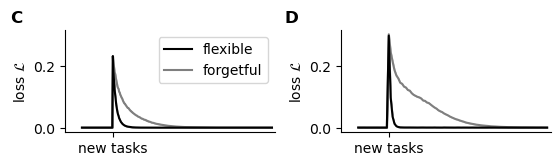

In [11]:
ax = axd['c']
fill_between(ax, comp_tape.t.mean(0)[7604:7937]+(23*0.001), comp_tape.loss[:,7604:7937], color='k', label='flexible')
fill_between(ax, forget_comp_tape.t.mean(0)[7604:7937]+(23*0.001), forget_comp_tape.loss[:,7604:7937], color="tab:gray", label='forgetful',zorder=-1)
ax.dataLim.x0 = 22.8
ax.dataLim.x1 = 23.8
ax.dataLim.y0 = 0
ax.dataLim.y1 = 0.3
default_x_ticks = [23]
ax.set_xticks(default_x_ticks, ['new tasks'])
ax.set_ylabel(r'loss $\mathcal{L}$')
ax.legend()

ax = axd['d']
fill_between(ax, forget_conc_tape.t.mean(0)[2260:2360]+(23*0.01), forget_conc_tape.loss[:,2260:2360], color='tab:gray')
fill_between(ax, conc_tape.t.mean(0)[2260:2360]+(23*0.01), conc_tape.loss[:,2260:2360], color='k')
ax.dataLim.x0 = 22.8
ax.dataLim.x1 = 23.8
ax.dataLim.y0 = 0
ax.dataLim.y1 = 0.3
default_x_ticks = [23]
ax.set_xticks(default_x_ticks, ['new tasks'])
ax.set_ylabel(r'loss $\mathcal{L}$')
fig